Epoch [10/100], Loss: 0.2798
Epoch [20/100], Loss: 0.1410
Epoch [30/100], Loss: 0.0791
Epoch [40/100], Loss: 0.0546
Epoch [50/100], Loss: 0.0421
Epoch [60/100], Loss: 0.0355
Epoch [70/100], Loss: 0.0308
Epoch [80/100], Loss: 0.0272
Epoch [90/100], Loss: 0.0243
Epoch [100/100], Loss: 0.0218


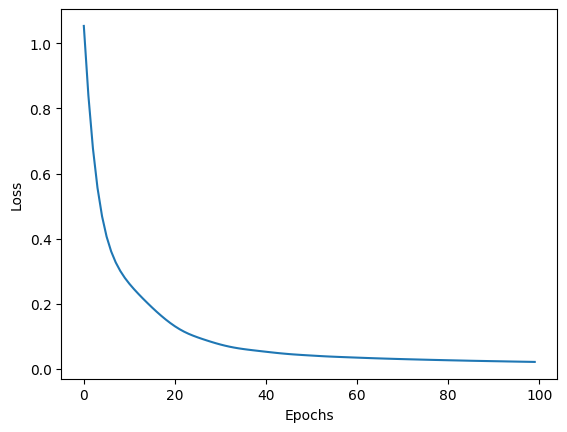

tensor([[ 1.7650e+00, -3.6218e-01,  1.4448e+00,  7.9067e-01],
        [-5.2506e-02, -8.2257e-01,  7.6276e-01,  9.2230e-01],
        [-9.0068e-01,  7.8881e-01, -1.2834e+00, -1.3154e+00],
        [-5.3718e-01,  1.9398e+00, -1.1697e+00, -1.0522e+00],
        [ 1.8983e-01, -3.6218e-01,  4.2173e-01,  3.9577e-01],
        [-1.0218e+00,  3.2841e-01, -1.4539e+00, -1.3154e+00],
        [ 5.5333e-01,  5.5861e-01,  1.2743e+00,  1.7121e+00],
        [-7.7951e-01,  2.4002e+00, -1.2834e+00, -1.4471e+00],
        [ 3.1100e-01, -1.0528e+00,  1.0469e+00,  2.6414e-01],
        [-9.0068e-01,  1.0190e+00, -1.3402e+00, -1.1838e+00],
        [-1.7489e+00, -3.6218e-01, -1.3402e+00, -1.3154e+00],
        [-1.7367e-01, -5.9237e-01,  1.9438e-01,  1.3251e-01],
        [ 6.7450e-01,  3.2841e-01,  4.2173e-01,  3.9577e-01],
        [-1.0218e+00,  7.8881e-01, -1.2266e+00, -1.0522e+00],
        [-1.7489e+00,  3.2841e-01, -1.3971e+00, -1.3154e+00],
        [ 1.4015e+00,  3.2841e-01,  5.3541e-01,  2.6414e-01],
        

In [69]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Load the Iris dataset from CSV
iris_df = pd.read_csv("iris.csv")

# Map string labels to integers
label_mapping = {"Setosa": 0, "Versicolor": 1, "Virginica": 2}
iris_df["variety"] = iris_df["variety"].map(label_mapping)

# Shuffle the dataset
iris_df = iris_df.sample(frac=1).reset_index(drop=True)

# Split features and target
X = iris_df.drop(columns=["variety"]).values
y = iris_df["variety"].values

# Normalize features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.int64)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(X))
X_train_tensor, X_test_tensor = X_tensor[:train_size], X_tensor[train_size:]
y_train_tensor, y_test_tensor = y_tensor[:train_size], y_tensor[train_size:]


# Define the neural network model using PyTorch
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 100)
        self.fc2 = nn.Linear(100, 3)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        return x


# Instantiate the model
model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Plot the loss curve
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    print(X_test_tensor)
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    print("Predictions:", predicted)
    accuracy = (predicted == y_test_tensor).float().mean()
    print("Test Accuracy:", accuracy.item())

    outputs = model(
        torch.tensor(
            iris_df.drop(columns=["variety"]).values,
            dtype=torch.float32,
        )
    )
    _, predicted = torch.max(outputs, 1)
    print("Prediction:", predicted)